In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn import datasets
import  numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import learning_curve

In [ ]:
col_names = ['pregnant', 'glucose', 'bp', 'skin', 
             'insulin', 'bmi', 'pedigree', 'age', 'label']
pima = pd.read_csv('/content/diabetes.csv', header=None, names=col_names)
pima = pima[1:]
pima.head()

,pregnant,glucose,bp,skin,insulin,bmi,pedigree,age,label
1,6,148,72,35,0,33.6,0.627,50,1
2,1,85,66,29,0,26.6,0.351,31,0
3,8,183,64,0,0,23.3,0.672,32,1
4,1,89,66,23,94,28.1,0.167,21,0
5,0,137,40,35,168,43.1,2.288,33,1


Разделите эти данные на тестовую и обучающую выборки

In [ ]:
Y = pima.label
X = pima.drop(['label'], axis=1)

Y = Y.astype('int32')

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, train_size=0.8)

Постройте модель классификации для определения заболевания

In [ ]:
cls = LogisticRegression(max_iter=1000, C=0.9)

cls.fit(x_train, y_train)

LogisticRegression(C=0.9, max_iter=1000)

In [ ]:
y_pred = cls.predict(x_test)

metrics.confusion_matrix(y_test, y_pred)

array([[93, 15],
       [20, 26]])

Text(0.5, 15.0, 'Предсказанные значения')

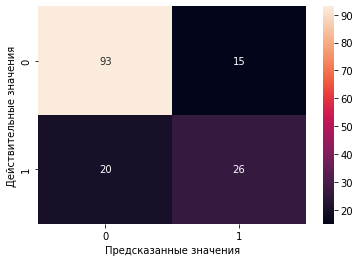

In [ ]:
%matplotlib inline
class_names = [0, 1]
fig, ax = plt.subplots()
ticks = np.arange(len(class_names))
plt.xticks(ticks, class_names)
plt.yticks(ticks, class_names)
sns.heatmap(pd.DataFrame(metrics.confusion_matrix(y_test, y_pred)), annot=True)
plt.ylabel('Действительные значения')
plt.xlabel('Предсказанные значения')

Оцените качество модели на тестовой выборке с помощью следующих метрик

In [ ]:
print("Достоверность предсказания:", metrics.accuracy_score(y_test, y_pred))

Достоверность предсказания: 0.7727272727272727


In [ ]:
print("Точность:", metrics.precision_score(y_test, y_pred))

Точность: 0.6341463414634146


In [ ]:
print("Полнота:", metrics.recall_score(y_test, y_pred))

Полнота: 0.5652173913043478


**Достоверность предсказаний (accuracy) просто считает долю правильных ответов. Это не точно позазывает как хорошо работает модель.**

**Точность (precision) показывает сколько объектов нашла положительных, которые действительно положительные.**

**Полнота (recall) показывает, какую долю объектов положительного класса из всех объектов положительного класса нашел алгоритм.**

**Данная модель предскажит сколько реально больны раком - 62%, тоесть в нашем случае это 32 пациета из 51, кто реально болен. Процент не такой уж маленький, но остальных 19 пациентов, кто реально болен, модель выявит как здоровых.**

# Дополнительные задания

Метод опорных векторов с линейным ядром (SVC)

In [ ]:
from sklearn import svm

svc = svm.SVC(kernel='linear', max_iter=1000)
svc.fit(x_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:289: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  ConvergenceWarning,


SVC(kernel='linear', max_iter=1000)

In [ ]:
y_pred_svcL = svc.predict(x_test)

metrics.confusion_matrix(y_test, y_pred)

array([[93, 15],
       [20, 26]])

Text(0.5, 15.0, 'Предсказанные значения')

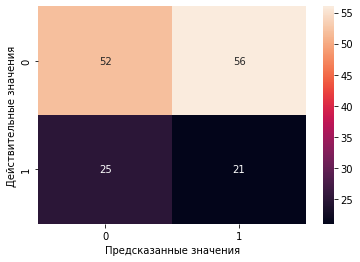

In [ ]:
%matplotlib inline
class_names = [0, 1]
fig, ax = plt.subplots()
ticks = np.arange(len(class_names))
plt.xticks(ticks, class_names)
plt.yticks(ticks, class_names)
sns.heatmap(pd.DataFrame(metrics.confusion_matrix(y_test, y_pred_svcL)), annot=True)
plt.ylabel('Действительные значения')
plt.xlabel('Предсказанные значения')

In [ ]:
print("Достоверность предсказания:", metrics.accuracy_score(y_test, y_pred_svcL))
print("Точность:", metrics.precision_score(y_test, y_pred_svcL))
print("Полнота:", metrics.recall_score(y_test, y_pred_svcL))

Достоверность предсказания: 0.474025974025974
Точность: 0.2727272727272727
Полнота: 0.45652173913043476


**Данная модель предсказывает чуть хуже**

Метод опорных векторов с гауссовым ядром (SVC)

In [ ]:
svc_2 = svm.SVC(max_iter=1000)
svc_2.fit(x_train, y_train)

SVC(max_iter=1000)

In [ ]:
y_pred_svcG = svc_2.predict(x_test)

metrics.confusion_matrix(y_test, y_pred)

array([[88, 13],
       [28, 25]])

Text(0.5, 15.0, 'Предсказанные значения')

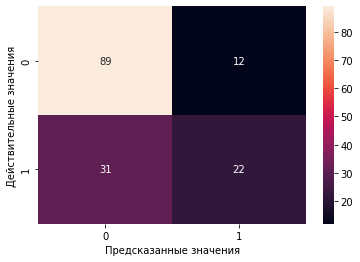

In [ ]:
%matplotlib inline
class_names = [0, 1]
fig, ax = plt.subplots()
ticks = np.arange(len(class_names))
plt.xticks(ticks, class_names)
plt.yticks(ticks, class_names)
sns.heatmap(pd.DataFrame(metrics.confusion_matrix(y_test, y_pred_svcG)), annot=True)
plt.ylabel('Действительные значения')
plt.xlabel('Предсказанные значения')

**Данная модель предсказывает почти одинаково из числа тех кто реально болен**

Метод k ближайших соседей (KNeighborsClassifier)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

neigh = KNeighborsClassifier(weights='distance')
neigh.fit(x_train, y_train)

KNeighborsClassifier(weights='distance')

In [ ]:
y_pred_neign = neigh.predict(x_test)

Text(0.5, 15.0, 'Предсказанные значения')

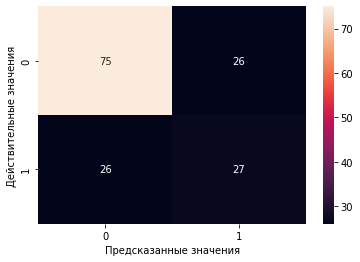

In [ ]:
%matplotlib inline
class_names = [0, 1]
fig, ax = plt.subplots()
ticks = np.arange(len(class_names))
plt.xticks(ticks, class_names)
plt.yticks(ticks, class_names)
sns.heatmap(pd.DataFrame(metrics.confusion_matrix(y_test, y_pred_neign)), annot=True)
plt.ylabel('Действительные значения')
plt.xlabel('Предсказанные значения')

**Данная модель предсказывает почти также как первая (модель логистической регрессии)**

Многослойный перцептрон (MLP)

In [ ]:
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier(max_iter=500)
mlp.fit(x_train, y_train)

MLPClassifier(max_iter=500)

In [ ]:
y_pred_mlp = mlp.predict(x_test)

Text(0.5, 15.0, 'Предсказанные значения')

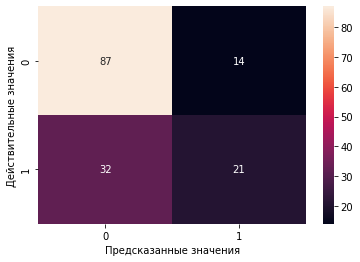

In [ ]:
%matplotlib inline
class_names = [0, 1]
fig, ax = plt.subplots()
ticks = np.arange(len(class_names))
plt.xticks(ticks, class_names)
plt.yticks(ticks, class_names)
sns.heatmap(pd.DataFrame(
    metrics.confusion_matrix(y_test, y_pred_mlp)),
    annot=True)
plt.ylabel('Действительные значения')
plt.xlabel('Предсказанные значения')

**На мой взгляд, лучшая из всех моделей самая первая. Если смотреть исключительно на число тех, кого модель выявила здоровыми из реально больных.**

In [ ]:
def draw_learning_curve(estimator, x, y, size=np.linspace(0.1, 1, 10), cv=10):

  for scoring, color in zip(["accuracy", "precision", "recall"], ["r", "g", "b"]):
    sizes, training_scores, testing_scores = learning_curve(estimator, x, y, scoring=scoring, cv=cv, train_sizes=size)
    plt.plot(sizes, testing_scores.mean(1), '--', color=color, label=scoring)
  
  print(scoring)

  plt.title("Learning curves")
  plt.xlabel("Size"), plt.ylabel("Score"), plt.legend(loc="best")
  plt.tight_layout()
  plt.show()

recall


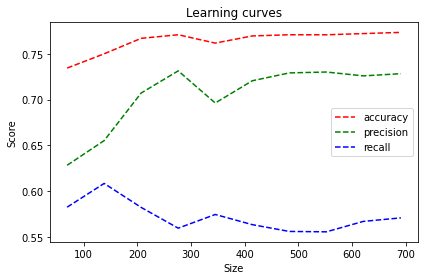

In [ ]:
draw_learning_curve(cls, x=X, y=Y)

In [ ]:
draw_learning_curve(svc, x=X, y=Y)

In [ ]:
draw_learning_curve(svc_2, x=X, y=Y)

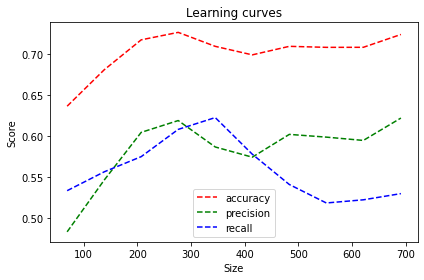

In [ ]:
draw_learning_curve(neigh, x=X, y=Y)

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multi

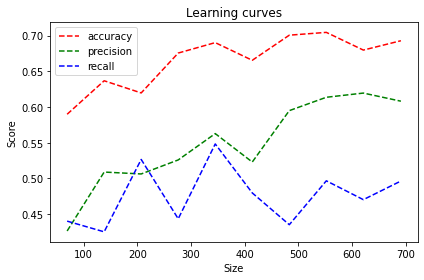

In [ ]:
draw_learning_curve(mlp, x=X, y=Y)

### **IRIS**

In [ ]:
iris = datasets.load_iris()
X2 = iris.data
Y2 = iris.target  

x2_train, x2_test, y2_train, y2_test = train_test_split(X2, Y2, test_size=0.2, random_state=True)

In [ ]:
def create_model(model, average='weighted'):
  model.fit(x2_train, y2_train)

  y2_pred = model.predict(x2_test)

  %matplotlib inline
  class_names = [0, 1]
  fig, ax = plt.subplots()
  ticks = np.arange(len(class_names))
  plt.xticks(ticks, class_names)
  plt.yticks(ticks, class_names)
  sns.heatmap(pd.DataFrame(
      metrics.confusion_matrix(y2_test, y2_pred)),
      annot=True)
  plt.ylabel('Действительные значения')
  plt.xlabel('Предсказанные значения')

In [ ]:
def accuracy(estimator, x, y):
  y_pred = estimator.predict(x)
  return metrics.accuracy_score(y, y_pred)

def precision(estimator, x, y):
  y_pred = estimator.predict(x)
  return metrics.precision_score(y, y_pred, average='weighted', zero_division=0)

def recall(estimator, x, y):
  y_pred = estimator.predict(x)
  return metrics.recall_score(y, y_pred, average='weighted', zero_division=0)

def draw_learning_curve2(estimator, x, y, size=np.linspace(0.1, 1, 10), cv=10):
  plt.figure(figsize=(10,10))

  for label, scoring, color in zip(['accuracy', 'precision', 'recall'], [accuracy, precision, recall], ["r", "g", "b"]):
    sizes, training_scores, testing_scores = learning_curve(estimator, x, y, scoring=scoring, cv=cv, train_sizes=size)
    plt.plot(sizes, testing_scores.mean(1), '--', color=color, label=label, linewidth=6)
  
  plt.title("Learning curves")
  plt.xlabel("Size"), plt.ylabel("Score"), plt.legend(loc="best")
  plt.show()


In [ ]:
def stats(x, y):
  accuracy = metrics.accuracy_score(y_test, y_pred)
  precision = metrics.precision_score(y_test, y_pred, average='weighted')
  recall = metrics.recall_score(y_test, y_pred, average='weighted')
  return pd.Series(
      (accuracy, precision, recall),
      index=['accuracy', 'precision', 'recall']
  )

accuracy     0.772727
precision    0.766595
recall       0.772727
dtype: float64

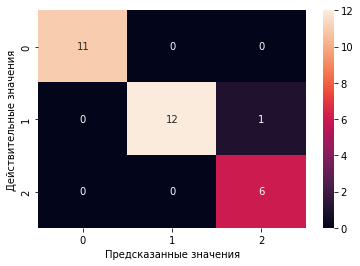

In [ ]:
cls2 = LogisticRegression(max_iter=1000, C=0.9)
create_model(cls2)
stats(y2_test, cls2.predict(x2_test))

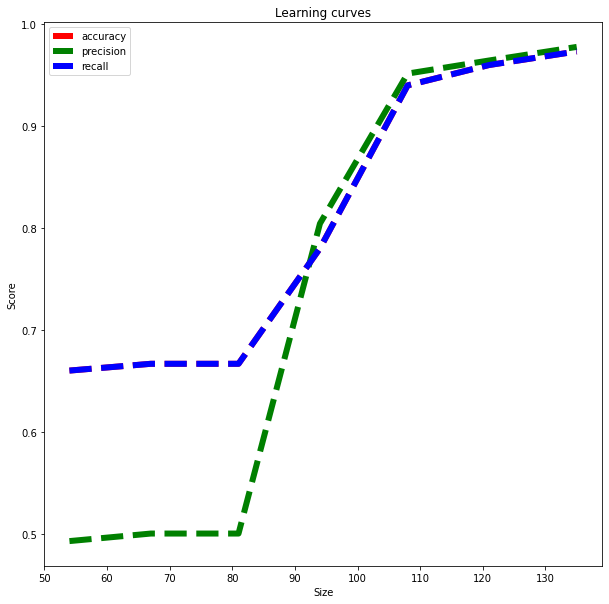

In [ ]:
draw_learning_curve2(cls2, x=X2, y=Y2)

accuracy     0.772727
precision    0.766595
recall       0.772727
dtype: float64

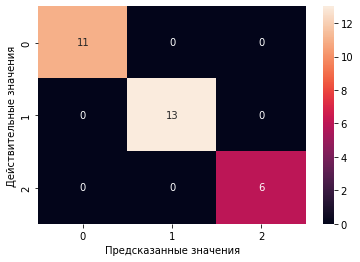

In [ ]:
svc3 = svm.SVC(kernel='linear', max_iter=1000)
create_model(svc3)
stats(y2_test, svc3.predict(x2_test))

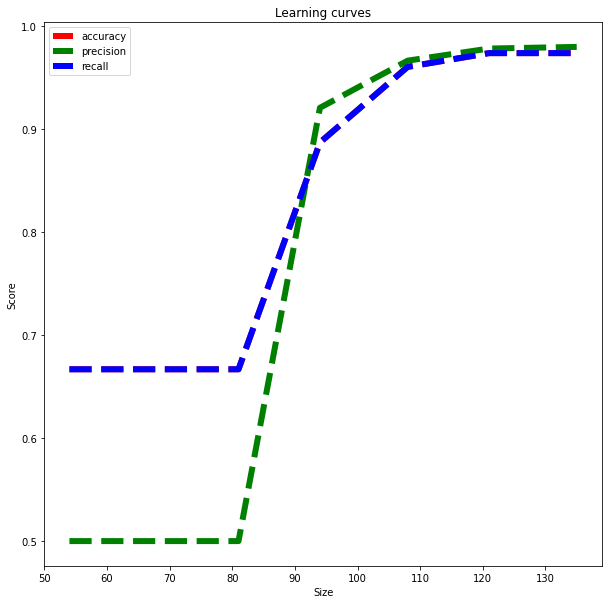

In [ ]:
draw_learning_curve2(svc3, x=X2, y=Y2)

accuracy     0.772727
precision    0.766595
recall       0.772727
dtype: float64

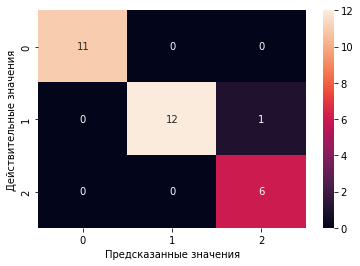

In [ ]:
svc_4 = svm.SVC(max_iter=1000)
create_model(svc_4)
stats(y2_test, svc_4.predict(x2_test))

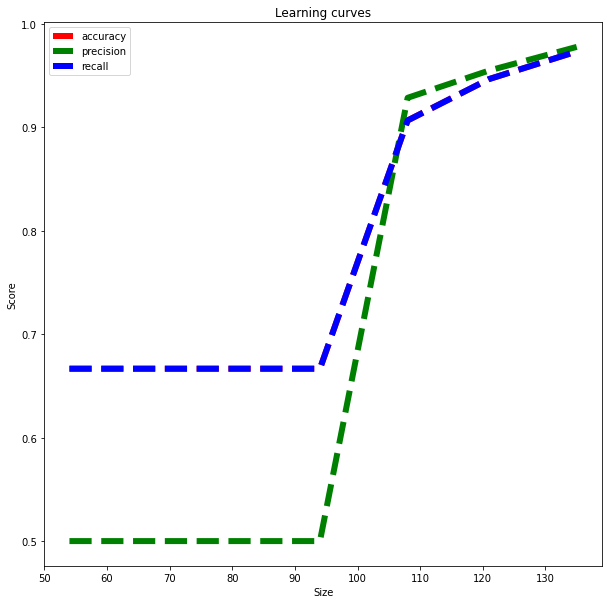

In [ ]:
draw_learning_curve2(svc_4, x=X2, y=Y2)

accuracy     0.772727
precision    0.766595
recall       0.772727
dtype: float64

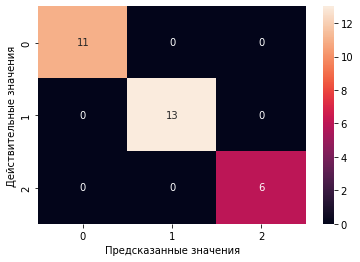

In [ ]:
neigh = KNeighborsClassifier(weights='distance')
create_model(neigh)
stats(y2_test, neigh.predict(x2_test))

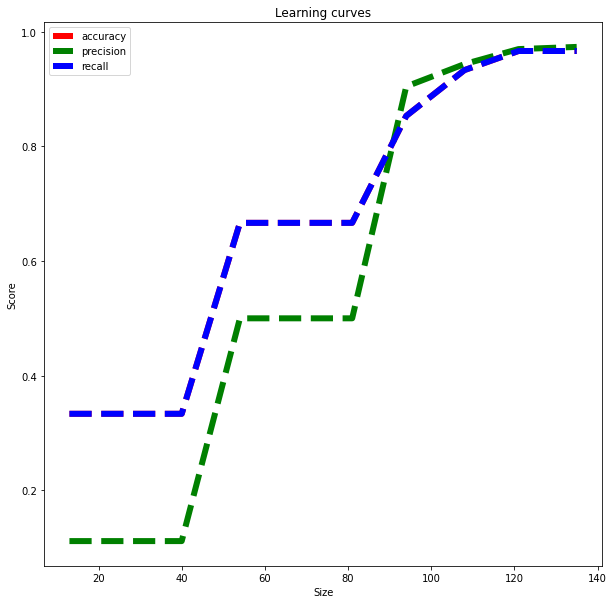

In [ ]:
draw_learning_curve2(neigh, x=X2, y=Y2)

accuracy     0.772727
precision    0.766595
recall       0.772727
dtype: float64

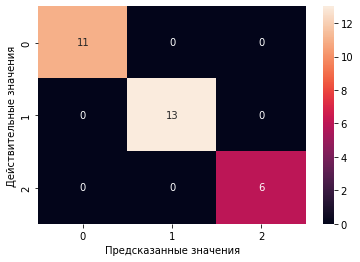

In [ ]:
mlp2 = MLPClassifier(max_iter=1000)
create_model(mlp2)
stats(y2_test, mlp2.predict(x2_test))

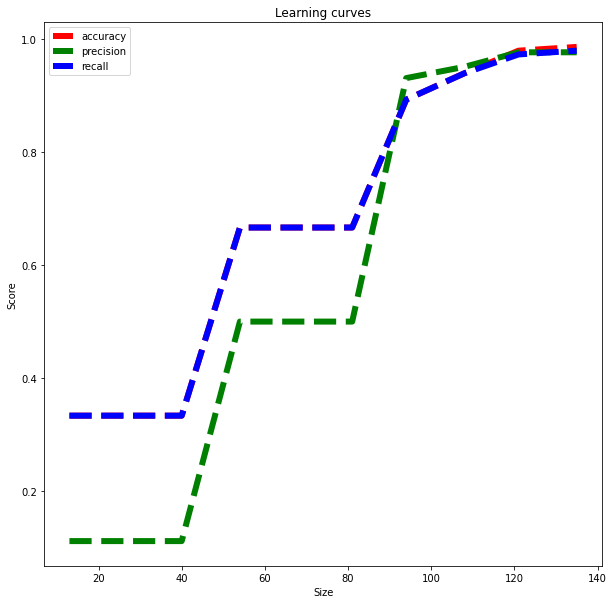

In [ ]:
draw_learning_curve2(mlp2, x=X2, y=Y2)